In [1]:
import numpy as np
import matplotlib.pyplot as plt

from oracle import make_oracle

In [2]:
def plot_weights(oracle, optimize, penalty_range, names=None, intercept=True):
    weight_path = np.zeros((oracle.dim, len(penalty_range)))

    w_init = np.zeros((oracle.dim, 1))
    for i, penalty in enumerate(penalty_range):
        w = optimize(oracle, w_init, lambda_ = penalty)
        
        weight_path[:, i] = w.ravel()

    if not intercept:
        weight_path = weight_path[:-1]
        
    plt.figure(figsize=(12, 8))
    for i, w in enumerate(weight_path):
        plt.plot(penalty_range, w)
    
    plt.xlabel("$\lambda$")
    plt.ylabel("$W_{i}$")
    plt.grid()

In [48]:
def prox_l1(w, gamma):
    return np.sign(w) * np.maximum(np.abs(w) - gamma, 0)

In [26]:
def optimize_lasso(oracle, start_point, tol=1e-8, lambda_=1e-2, max_iter=10000):
    w, L = start_point, 1.0
    
    for i in range(max_iter):

        value_w, grad_w = oracle.fuse_value_grad(w)
        
        while True:
            w_new = prox_l1(w - (1/L) * grad_w.reshape(-1, 1), (1/L) * lambda_)
            
            w_new_sub_w = w_new - w
            if oracle.value(w_new) <= value_w + grad_w @ w_new_sub_w + (L / 2) * (w_new_sub_w.T @ w_new_sub_w):
                break
                
            L = 2 * L    
        
        if (w_new_sub_w.T @ w_new_sub_w) * L < tol:
            break
        
        w = w_new
        L = L / 2
#         print(f"Iteration {i}: {oracle.value(w_new)}")
        
    return w

In [50]:
1e-7

1e-07

In [7]:
oracle = make_oracle("data/a1a.txt")
w_init = np.zeros((oracle.dim, 1))

In [18]:
%%time
oracle.value(optimize_lasso(oracle, w_init, lambda_=0.00001))

CPU times: user 22.5 s, sys: 164 ms, total: 22.7 s
Wall time: 23.5 s


0.298994673593453

In [22]:
%%time
oracle.value(optimize_lasso_momo(oracle, w_init, lambda_=0.00001))

CPU times: user 8 s, sys: 76.8 ms, total: 8.08 s
Wall time: 8.58 s


0.2989354986813923

CPU times: user 1min 46s, sys: 1.32 s, total: 1min 48s
Wall time: 2min 6s


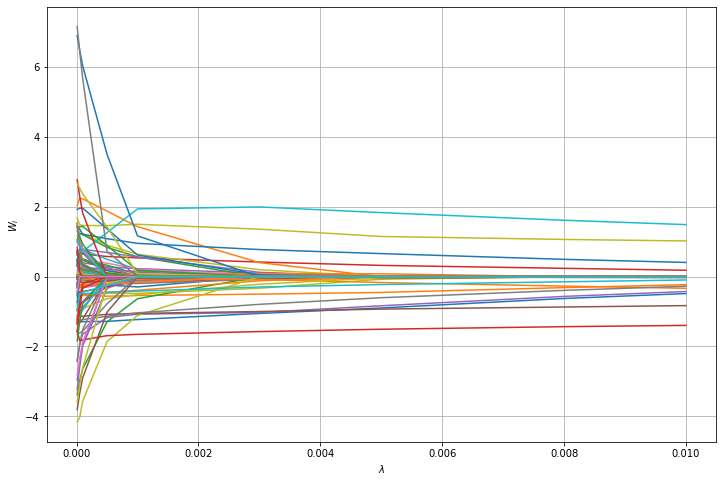

In [58]:
%%time
plot_weights(oracle, optimize_lasso, [0.01, 0.008, 0.005, 0.003, 0.001, 0.0005, 0.0001, 0.00005, 0.00001][::-1])